In [1]:
#import the library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from datetime import datetime
from datetime import timedelta
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# use glob to get all the csv files in the folder
path = os.getcwd()

# Returns list of files in the folder which is specifed path
files = os.listdir(path)

In [3]:
for file in files:
    if file.endswith(".csv"):# Checking wheter file endswith .csv
        # os.sep returns the separtor of operator system
        exec(f"{file[:-4]} = pd.read_csv(file)")
        print("\n",file[:-4])
        display(pd.read_csv(file).info())
        display(pd.read_csv(file).head())


 contracts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   contract_id         1754 non-null   int64 
 1   leads_id            1754 non-null   int64 
 2   date                1754 non-null   object
 3   subscription_type   1754 non-null   object
 4   number_of_employee  1754 non-null   int64 
 5   reten_flag          1754 non-null   int64 
 6   user_price          1754 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 96.0+ KB


None

,contract_id,leads_id,date,subscription_type,number_of_employee,reten_flag,user_price
0,1194,3338,2022-12-19,Startup,15,0,20000
1,1737,3338,2023-12-19,Startup,15,1,20000
2,268,980,2021-10-07,Startup,275,0,20000
3,441,1579,2022-02-01,Startup,275,0,20000
4,1283,1579,2023-02-01,Startup,275,1,20000



 discounts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   contract_id         442 non-null    int64 
 1   discount_type_code  442 non-null    object
 2   deal_won            442 non-null    object
 3   user_price_after    442 non-null    int64 
 4   reten_flag          442 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 17.4+ KB


None

,contract_id,discount_type_code,deal_won,user_price_after,reten_flag
0,4,D1,2021-01-01 10:45:45.000000 UTC,18000,0
1,8,D1,2021-01-04 12:27:39.000000 UTC,18000,0
2,12,D1,2021-01-05 10:40:32.000000 UTC,18000,0
3,14,D1,2021-01-05 11:38:35.000000 UTC,18000,0
4,19,D1,2021-01-07 11:34:42.000000 UTC,18000,0



 discount_types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   discount_type_code  2 non-null      object
 1   discount_type       2 non-null      object
 2   discount_type_desc  2 non-null      object
dtypes: object(3)
memory usage: 176.0+ bytes


None

,discount_type_code,discount_type,discount_type_desc
0,D2,2022_quarter_discount,3 month discounts
1,D1,2021_quarter_discount,3 month discounts



 funnel
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16328 entries, 0 to 16327
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   funnel_id  16328 non-null  int64 
 1   leads_id   16328 non-null  int64 
 2   stage_id   16328 non-null  int64 
 3   TimeStamp  16328 non-null  object
 4   reason     1990 non-null   object
dtypes: int64(3), object(2)
memory usage: 637.9+ KB


None

,funnel_id,leads_id,stage_id,TimeStamp,reason
0,1,1,101,2020-11-25 13:49:44.000000 UTC,NaN
1,2,2,101,2020-11-26 09:04:53.000000 UTC,NaN
2,3,3,101,2020-11-26 09:26:32.000000 UTC,NaN
3,4,4,101,2020-11-26 13:56:31.000000 UTC,NaN
4,5,5,101,2020-11-27 11:07:38.000000 UTC,NaN



 google_analytics
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11939 entries, 0 to 11938
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   leads_id        11939 non-null  int64 
 1   ga_id           11939 non-null  int64 
 2   Page_Name       11939 non-null  object
 3   Page_timestamp  11939 non-null  object
dtypes: int64(2), object(2)
memory usage: 373.2+ KB


None

,leads_id,ga_id,Page_Name,Page_timestamp
0,1,1,/home,2020-11-25 13:47:09.000000 UTC
1,7,24,/home,2020-11-30 12:12:30.000000 UTC
2,8,27,/home,2020-11-30 16:08:34.000000 UTC
3,13,47,/home,2020-12-01 11:22:49.000000 UTC
4,16,53,/home,2020-12-02 12:56:54.000000 UTC



 industries
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   industry_code  6 non-null      int64 
 1   industry       6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


None

,industry_code,industry
0,3,Finance
1,5,Retail
2,1,Education
3,6,Technology
4,2,F&B



 leads
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   leads_id             3397 non-null   int64 
 1   session_source_code  3397 non-null   int64 
 2   industry_code        3397 non-null   int64 
 3   leads_registered     3397 non-null   object
 4   number_of_employee   3397 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 132.8+ KB


None

,leads_id,session_source_code,industry_code,leads_registered,number_of_employee
0,244,1,1,2021-02-03 14:36:48.000000 UTC,5
1,290,4,1,2021-02-23 14:27:36.000000 UTC,5
2,425,1,1,2021-03-30 15:10:12.000000 UTC,5
3,437,4,1,2021-04-01 15:39:02.000000 UTC,5
4,462,4,1,2021-04-06 10:44:11.000000 UTC,5



 marketing_spends
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            26 non-null     object
 1   CPC             26 non-null     object
 2   Direct          26 non-null     object
 3   Organic Search  26 non-null     object
 4   Organic Social  26 non-null     object
 5   Refferal        26 non-null     object
dtypes: object(6)
memory usage: 1.3+ KB


None

,Date,CPC,Direct,Organic Search,Organic Social,Refferal
0,2020-Dec,"4,000,000","5,300,000","3,800,000","4,000,000","14,000,000"
1,2020-Nov,"1,000,000","800,000","300,000","500,000","1,000,000"
2,2021-Apr,"5,000,000","4,800,000","3,000,000","5,500,000","12,500,000"
3,2021-Aug,"4,000,000","5,500,000","3,800,000","5,000,000","11,500,000"
4,2021-Dec,"7,000,000","8,000,000","9,500,000","7,800,000","24,000,000"



 session_sources
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   session_source_code  5 non-null      int64 
 1   session_source       5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


None

,session_source_code,session_source
0,1,CPC
1,4,Organic Social
2,3,Organic Search
3,2,Direct
4,5,Refferal



 stages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   stage_id  8 non-null      int64 
 1   stage     8 non-null      object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,stage_id,stage
0,103,initial_communication_success
1,105,discussion_success
2,106,offer_sent
3,107,quotation_recieved
4,108,deal_won



 survey
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   leads_id                   901 non-null    int64
 1   NPS                        901 non-null    int64
 2   Pre-Sales Information      901 non-null    int64
 3   Sales's Product Knowledge  901 non-null    int64
 4   Respon Time                901 non-null    int64
 5   Communication              901 non-null    int64
dtypes: int64(6)
memory usage: 42.4 KB


None

,leads_id,NPS,Pre-Sales Information,Sales's Product Knowledge,Respon Time,Communication
0,2,9,2,5,4,5
1,6,8,3,4,1,3
2,8,8,4,2,3,3
3,9,7,4,2,1,2
4,10,8,3,2,4,2


Entity Relational Diagram (ERD)
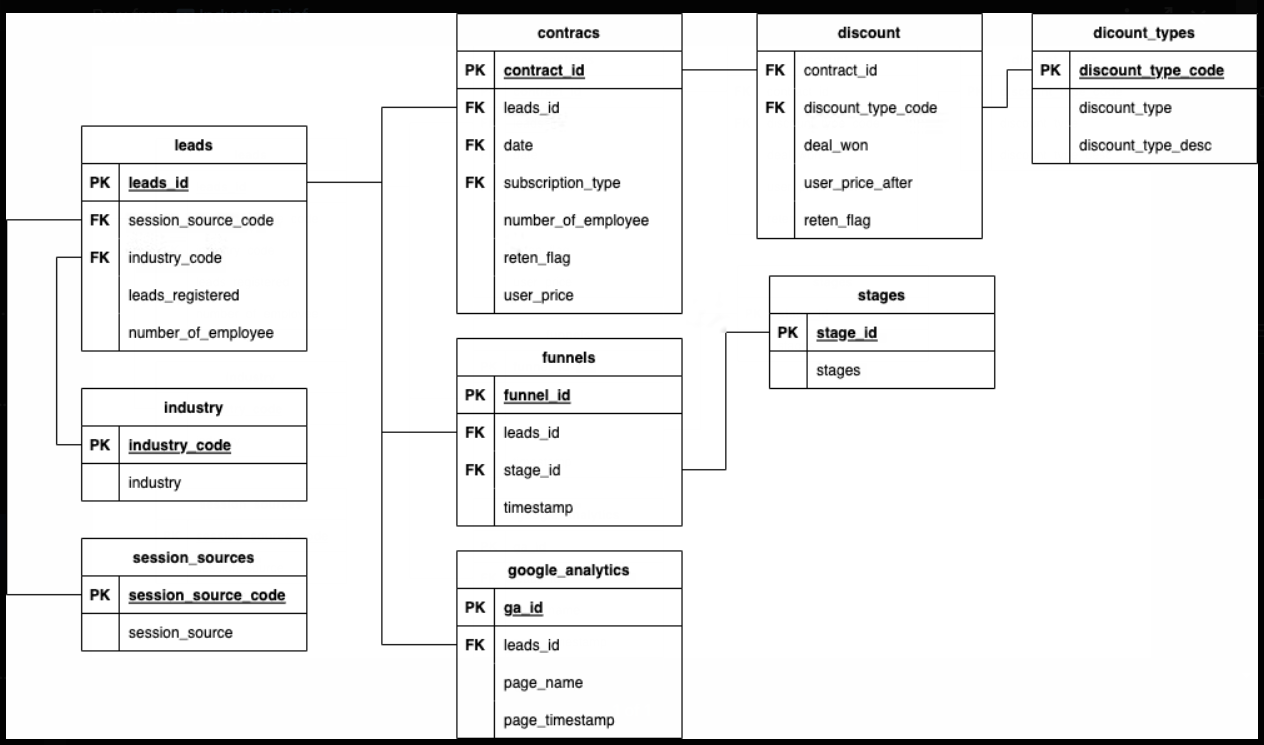

In [4]:
datetype = (contracts['date'], discounts['deal_won'], funnel['TimeStamp'], google_analytics['Page_timestamp'], leads['leads_registered'], marketing_spends['Date'])

In [5]:
contracts['date'] = pd.to_datetime(contracts['date'])
discounts['deal_won'] = pd.to_datetime(discounts['deal_won'])
funnel['TimeStamp'] = pd.to_datetime(funnel['TimeStamp'])
google_analytics['Page_timestamp'] = pd.to_datetime(google_analytics['Page_timestamp'])
leads['leads_registered'] = pd.to_datetime(leads['leads_registered'])
marketing_spends['Date'] = pd.to_datetime(marketing_spends['Date'])

# Business Background
The Expert acknowledged that our current marketing strategy is successfully attracting more leads. Now, the expert wants to make efficiency in the marketing strategy that has been implemneted by focusing more on strategies that can **attract the most qualified types of leads**.
<br> Therefore, DAA is expected to be able to provide spesific insight regarding which and what **marketing approach** can be focused more **to attract the most qualified leads**. DAA is also expected to **provide recommendation support** for developing marketing strategies that can meet the objectives.

## Pre-Processing Data

In [6]:
# merge contracts table with discounts table
new_contracts = contracts.merge(discounts, on='contract_id', how='left')
new_contracts['user_price_after'] = new_contracts['user_price_after'].fillna(new_contracts['user_price'])
new_contracts.drop(['deal_won','user_price','reten_flag_y'], axis=1, inplace=True)
new_contracts.rename({'user_price_after' : 'fixed_price', 'reten_flag_x' : 'reten_flag'}, axis=1, inplace=True)
new_contracts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754 entries, 0 to 1753
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   contract_id         1754 non-null   int64         
 1   leads_id            1754 non-null   int64         
 2   date                1754 non-null   datetime64[ns]
 3   subscription_type   1754 non-null   object        
 4   number_of_employee  1754 non-null   int64         
 5   reten_flag          1754 non-null   int64         
 6   discount_type_code  442 non-null    object        
 7   fixed_price         1754 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 123.3+ KB


In [7]:
new_cust = new_contracts.copy()
new_cust = new_cust[~(new_cust['reten_flag']==1)]
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 0 to 1752
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   contract_id         901 non-null    int64         
 1   leads_id            901 non-null    int64         
 2   date                901 non-null    datetime64[ns]
 3   subscription_type   901 non-null    object        
 4   number_of_employee  901 non-null    int64         
 5   reten_flag          901 non-null    int64         
 6   discount_type_code  442 non-null    object        
 7   fixed_price         901 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 63.4+ KB


In [8]:
clust = leads.merge(new_cust, on='leads_id', how='left')
clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3397 entries, 0 to 3396
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   leads_id              3397 non-null   int64              
 1   session_source_code   3397 non-null   int64              
 2   industry_code         3397 non-null   int64              
 3   leads_registered      3397 non-null   datetime64[ns, UTC]
 4   number_of_employee_x  3397 non-null   int64              
 5   contract_id           901 non-null    float64            
 6   date                  901 non-null    datetime64[ns]     
 7   subscription_type     901 non-null    object             
 8   number_of_employee_y  901 non-null    float64            
 9   reten_flag            901 non-null    float64            
 10  discount_type_code    442 non-null    object             
 11  fixed_price           901 non-null    float64            
dtypes: dat

In [9]:
#counts visits per leads
visits = google_analytics.groupby('leads_id', as_index=False)['ga_id'].count()
visits = visits.rename(columns={'ga_id':'total_visits'})
visits.head()

,leads_id,total_visits
0,1,5
1,2,3
2,3,2
3,4,5
4,5,3


In [10]:
#first page visits per leads
first_page = google_analytics.groupby('leads_id', as_index=False)['Page_Name'].first()
first_page = first_page.rename(columns={'Page_Name':'first_visits'})
first_page.head()

,leads_id,first_visits
0,1,/home
1,2,/features
2,3,/portofolio
3,4,/portofolio
4,5,/features


In [11]:
df = leads.merge(industries, on='industry_code', how='left')
df = df.merge(session_sources, on='session_source_code', how='left')
df = df.merge(visits, on='leads_id', how='left')
df = df.merge(first_page, on='leads_id', how='left')
df = df.drop(columns=['session_source_code','industry_code'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3397 entries, 0 to 3396
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   leads_id            3397 non-null   int64              
 1   leads_registered    3397 non-null   datetime64[ns, UTC]
 2   number_of_employee  3397 non-null   int64              
 3   industry            3397 non-null   object             
 4   session_source      3397 non-null   object             
 5   total_visits        3397 non-null   int64              
 6   first_visits        3397 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 212.3+ KB


## Exploratory Data Analysis

In [12]:
num_col = ['number_of_employee', 'total_visits']
cat_col = ['industry', 'session_source', 'first_visits']
df[cat_col].describe()

,industry,session_source,first_visits
count,3397,3397,3397
unique,6,5,8
top,Technology,CPC,/home
freq,901,1064,1134


In [13]:
df[num_col].describe()

,number_of_employee,total_visits
count,3397.000,3397.000
mean,124.742,3.515
std,119.111,1.560
min,5.000,1.000
25%,35.000,2.000
50%,90.000,4.000
75%,150.000,5.000
max,500.000,6.000


Because of current marketing campaign. we can overview our leads based on data above. In summary:
* **total leads**: 3397
* majority leads come from **CPC** channel
* mostly industry from **Technology**
* their **average page visits** is 3.515 page
* the size of the company based on number of employee varies between **5 to 500 employee** with **average 12 employee**

## Clustering
Using Kmeans method and only use `number_of_employee` and `total_visits` column to get lead's behavior so we can use it as actionable targeted marketing campaign

In [14]:
df_clust = df.copy()
df_clust = df_clust.set_index('leads_id')
df_clust = df_clust[num_col]
df_clust.head()

,number_of_employee,total_visits
leads_id,,
244,5,3
290,5,2
425,5,4
437,5,4
462,5,3


In [15]:
scaler = MinMaxScaler()
df_clust[num_col] = scaler.fit_transform(df_clust[num_col])
df_clust.head()

,number_of_employee,total_visits
leads_id,,
244,0.000,0.400
290,0.000,0.200
425,0.000,0.600
437,0.000,0.600
462,0.000,0.400


<Figure size 1600x800 with 0 Axes>

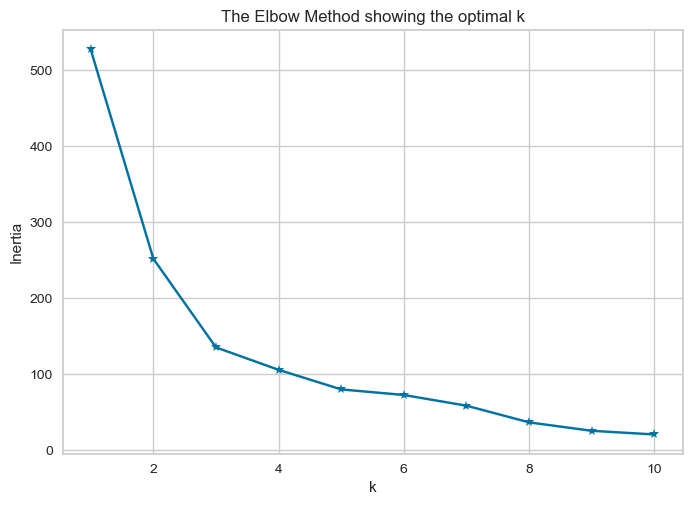

In [16]:
distortions = []
K = range(1,11)
for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 42, n_init='auto')
  kmeanModel.fit(df_clust)
  distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For k=2, the average silhouette score is 0.4579028586244205
For k=3, the average silhouette score is 0.5040453520704241
For k=4, the average silhouette score is 0.5099851364963163
For k=5, the average silhouette score is 0.5050016363520006
For k=6, the average silhouette score is 0.49481927527714953
For k=7, the average silhouette score is 0.5909685683779303
For k=8, the average silhouette score is 0.5734786510344576
For k=9, the average silhouette score is 0.615114512000533
For k=10, the average silhouette score is 0.6683229649958377


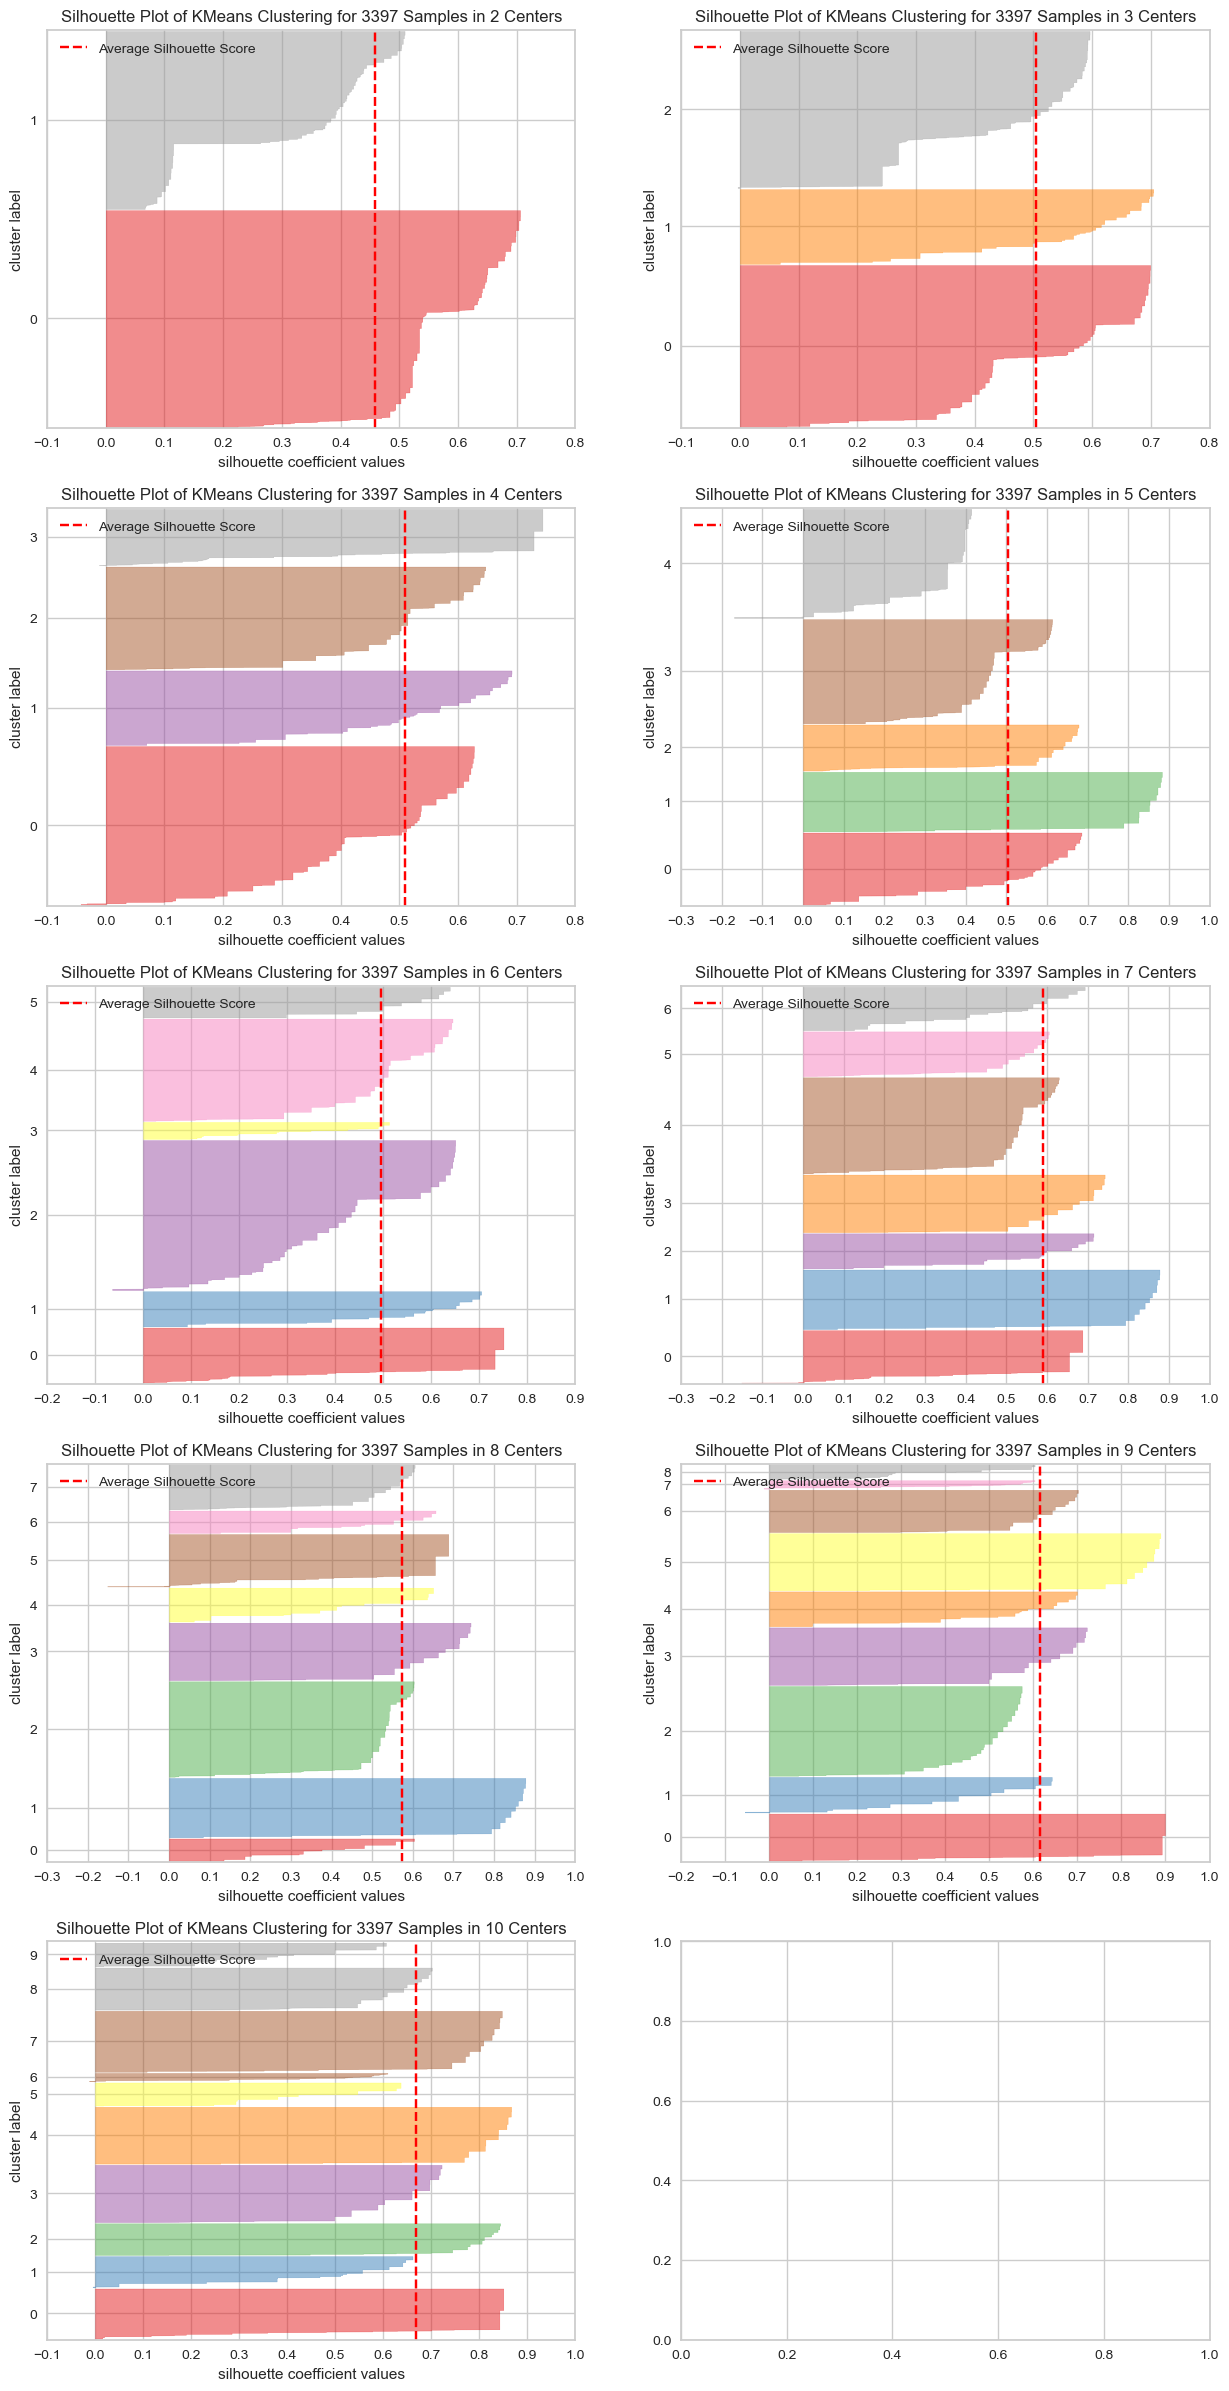

In [17]:
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters, n_init='auto')

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_clust)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [18]:
Kmodel = KMeans(n_clusters = 3 , random_state = 42, n_init='auto')
Kmodel = Kmodel.fit(df_clust)
df_cluster = df.copy()
df_cluster['cluster'] = Kmodel.labels_
df_cluster.head()

,leads_id,leads_registered,number_of_employee,industry,session_source,total_visits,first_visits,cluster
0,244,2021-02-03 14:36:48+00:00,5,Education,CPC,3,/form/demo,2
1,290,2021-02-23 14:27:36+00:00,5,Education,Organic Social,2,/features,2
2,425,2021-03-30 15:10:12+00:00,5,Education,CPC,4,/home,0
3,437,2021-04-01 15:39:02+00:00,5,Education,Organic Social,4,/features,0
4,462,2021-04-06 10:44:11+00:00,5,Education,Organic Social,3,/studycase,2


In [19]:
df_cluster.groupby('cluster')[num_col].mean()

,number_of_employee,total_visits
cluster,,
0,100.563,4.722
1,314.283,1.210
2,42.954,2.625


In [20]:
df_cluster.groupby('cluster')[cat_col].agg(pd.Series.mode)

,industry,session_source,first_visits
cluster,,,
0,Technology,CPC,/home
1,Finance,Refferal,/form/set-a-meeting
2,F&B,CPC,/features


In [21]:
most_visits = google_analytics.merge(df_cluster, how='left')
most_visits = most_visits.drop(columns=['Page_timestamp','leads_registered','number_of_employee','industry','session_source','total_visits','first_visits'])
most_visits.head()

,leads_id,ga_id,Page_Name,cluster
0,1,1,/home,0
1,7,24,/home,2
2,8,27,/home,2
3,13,47,/home,2
4,16,53,/home,1


In [22]:
most_visits = most_visits.groupby(['cluster','Page_Name'])['ga_id'].count().reset_index()
most_visits.head()

,cluster,Page_Name,ga_id
0,0,/features,1247
1,0,/form/brochure,833
2,0,/form/demo,924
3,0,/form/publications,407
4,0,/form/set-a-meeting,834


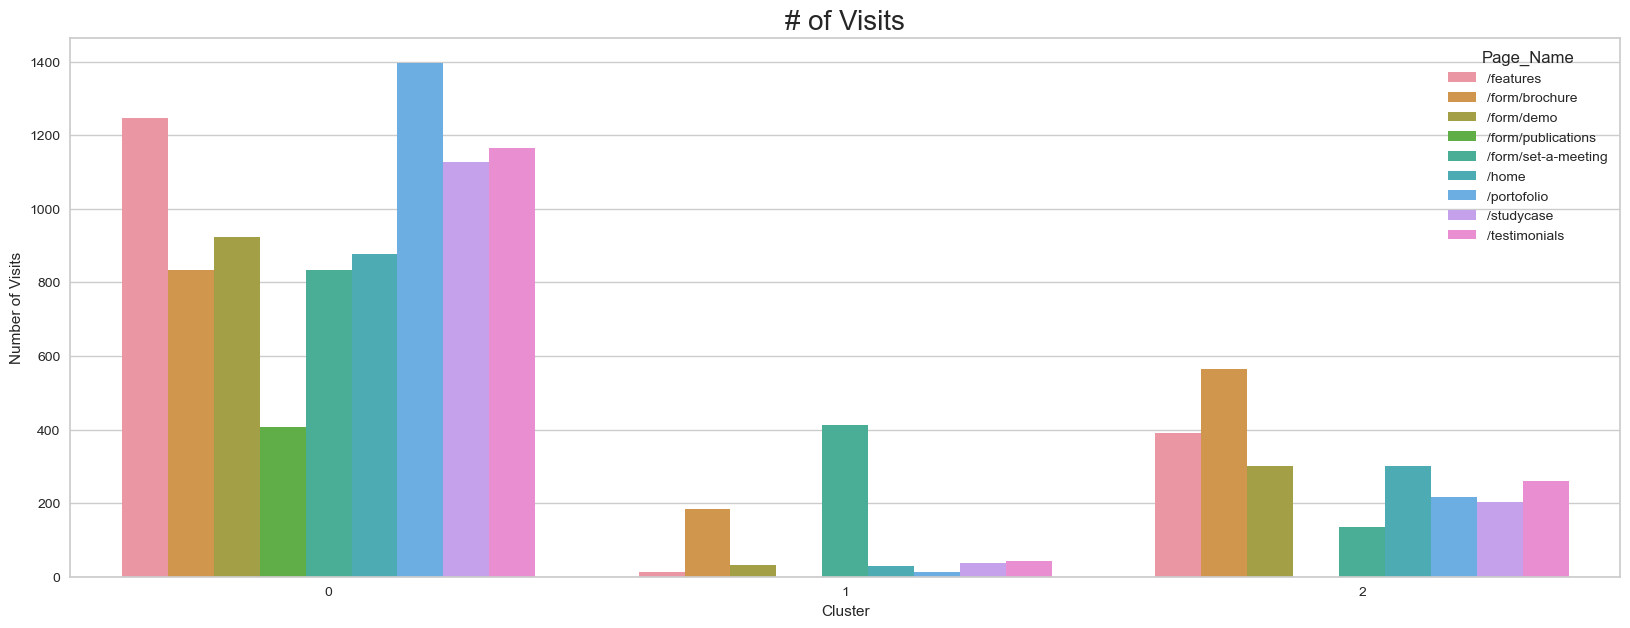

In [23]:
plt.figure(figsize=(20,7))
sns.barplot(x='cluster',y='ga_id',data=most_visits, hue='Page_Name')
plt.title('# of Visits', fontsize=20)
plt.xlabel('Cluster')
plt.ylabel('Number of Visits')
plt.show()

In [ ]:
df_c = new_cust.merge(df_cluster, how='left')
df_c = df_c.merge(survey, on='leads_id', how='left')
df_c.head()

In [ ]:
numerical = ['number_of_employee', 'fixed_price', 'total_visits', 'NPS', 'Pre-Sales Information', "Sales's Product Knowledge", 'Respon Time', 'Communication']
categorical = ['subscription_type', 'industry', 'session_source', 'first_visits']
cont_clust = df_c.copy()
cont_clust = cont_clust.set_index('leads_id')
cont_clust = cont_clust[numerical]
cont_clust.head()

In [ ]:
cont_clust[numerical] = scaler.fit_transform(cont_clust[numerical])
cont_clust.head()

In [ ]:
Kmodel_cont = KMeans(n_clusters = 3 , random_state = 42, n_init='auto')
Kmodel_cont = Kmodel.fit(cont_clust)
cont_cluster = df_c.copy()
cont_cluster['cluster_n'] = Kmodel_cont.labels_
cont_cluster.head()

In [ ]:
cont_cluster.groupby('cluster')['number_of_employee','Pre-Sales Information', "Sales's Product Knowledge", 'Respon Time', 'Communication'].describe().T

In [ ]:
cont_cluster.groupby('cluster_n')['number_of_employee','Pre-Sales Information', "Sales's Product Knowledge", 'Respon Time', 'Communication'].describe().T